# 고객별 연간 지출액 예측 (Linear Regression)

선형 회귀(Linear Regression): x값과 y값 사이의 선형 관계를 모델링하는 알고리즘
- 선형 관계: x가 증가함에 따라 y도 일정한 비율로 증가하거나 감소하는 선형적인 패턴을 보이는 관계

Linear Regression의 원리
- 목표 : x값과 y값 사이의 선형 관계를 가장 잘 설명하는 선 찾기
- 방법 : minimun RSS(Residual Sum of Square)
- 여러개 선의 RSS를 확인하고 그 중에서 RSS가 가장 작은 선이 최종 Linear Regression으로 채택

Gradient Descent (경사 하강법)
- 정의 : 경사의 방향과 크기를 이용해서 단계별로 극소점을 찾아 내려가는 방식
- 해당 방법을 사용하면 머신러닝 알고리즘이 기울기와 y절편을 움직여 볼 때 어느 방향으로 얼만큼 갔을 때 에러가 줄어드는지 그 방향성과 강도를 알고 움직임

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시


In [6]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [8]:
# 데이터 불러오기
df = pd.read_csv("ecommerce.csv")

print(df.shape)
df.head(3)

(500, 8)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [10]:
df.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [12]:
# 변수 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
# 수치 데이터 확인
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [19]:
# 불필요한 변수 버리기
df = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].copy()

print(df.shape)
df.head(3)

(500, 5)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


In [20]:
# Train & Test set 분리
from sklearn.model_selection import train_test_split

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.2
                                                    , random_state = 100)

In [23]:
# 확인
print('X_train의 shape : ', X_train.shape)
print('y_train의 shape : ', y_train.shape)
print('X_test의 shape : ', X_test.shape)
print('y_test의 shape : ', y_test.shape)

X_train의 shape :  (400, 4)
y_train의 shape :  (400,)
X_test의 shape :  (100, 4)
y_test의 shape :  (100,)


In [24]:
## Linear Regression 모델 만들기
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)

# 모델 학습
model = model.fit()

# 결과 확인
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Wed, 18 Sep 2024   Prob (F-statistic):                        0.00
Time:                         12:30:29   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 수식
Yearly Amount Spent = 11.9059 * Avg. Session Length + 34.3257 * Time on App -14.1405 * Time on Website + 61.0149 * Length of Membership

### 주요 지표
R-squared
- 범위 : 0과 1사이의 값
- 클수록 좋은 모델 (변수가 많으면 R-squared는 무조건 증가)
- Adj가 더욱 적절한 평가 기준 (분석에 사용한 변수의 개수를 고려해서 가중치를 적용)
- R-squared = SSR(Sum of Squares due to Regression) / SST(Total Sum of Squares)

Coef (직선의 기울기)
- 변수의 영향력 (강도와 방향)
- 데이터 스케일을 맞추지 않고 Coef만 가지고 변수의 중요성을 판단할 수는 없음 > scaling 기법을 활용해서 col간에 scale을 맞추는 작업이 필요
- ex. 'Time on App'와 'Time on Website'는 scale이 비슷하므로 Coef 비교 가능

P-value
- 신뢰할 수 있는 결과인지를 측정
- 0.05 이하면 양호

In [29]:
# 예측 및 평가
pred_y = model.predict(X_test)

<Axes: xlabel='Yearly Amount Spent'>

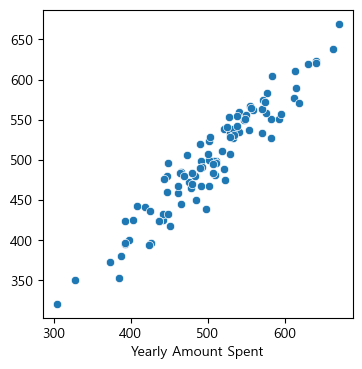

In [31]:
## 방법 1) visualization

# 예측이 잘 되었으면 그래프가 일직선
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_test, y=pred_y)

MSE (평균 제곱오차, Mean Squared Error)
- 단순히 실제 데이터와 예측 데이터 편차의 제곱 합이었던 오차제곱합(SSE)을 데이터의 크기로 나눠 평균으로 만든 것
- MSE가 0에 가까울수록 추측한 값이 원본에 가까운 것이기 때문에 정확도가 높다

In [32]:
## 방법 2) MSE
# 상대적인 수치로 다른 모델의 mse와 비교했을 때 의미를 가짐
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred_y)
mse

482.28901390889934

In [34]:
## 방법 3) RMSE(Root Mean Squared Error)
# rmse 역시 상대적인 수치로 다른 모델의 mse와 비교했을 때 의미를 가짐
rmse = mean_squared_error(y_test, pred_y, squared=False)
rmse

21.961079525125793

In [35]:
rmse1 = np.sqrt(mse)
rmse1

21.961079525125793

In [51]:
# y_test와 pred_y 확인
pd.DataFrame({'y_test': y_test, 'pred_y': pred_y})

,y_test,pred_y
69,451.575685,418.211323
29,554.722084,567.097473
471,541.049831,534.706617
344,442.722892,425.690888
54,522.404141,474.931682
...,...,...
460,618.845970,570.877250
152,555.892595,564.267305
154,595.803819,557.093996
56,520.898794,489.285778
